In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\Parth\Desktop\Interview\BlackFriday\BlackFriday.csv')

In [6]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [9]:
df.shape

(537577, 12)

In [10]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [11]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})
missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
User_ID,0,0.000000


In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=537577, step=1)

In [16]:
for i in df.columns:
    print(i, ':',df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


In [18]:
# Info about products
print('Number of products:',df['Product_ID'].nunique())
print('Number of categories:',df['Product_Category_1'].unique().max())
print('Highest and lowest purchase:',df['Purchase'].max(),',',df['Purchase'].min())

Number of products: 3623
Number of categories: 18
Highest and lowest purchase: 23961 , 185


In [19]:
# Info about shoppers
print('Number of shoppers:',df['User_ID'].nunique())
print('Years in city:',df['Stay_In_Current_City_Years'].unique())
print('Age Groups:',df['Age'].unique())

Number of shoppers: 5891
Years in city: ['2' '4+' '3' '1' '0']
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [21]:
#Gender Count
count_m = df[df['Gender']=='M'].count()[0]
count_f = df[df['Gender']=='F'].count()[0]
print('Number of male clients:',count_m)
print('Number of female clients:',count_f)

Number of male clients: 405380
Number of female clients: 132197


In [22]:
print('Female Purchases:',round(df[df['Gender']=='F']['Purchase'].sum()/count_f,3))
print('Male Purchases:',round(df[df['Gender']=='M']['Purchase'].sum()/count_m,3))

Female Purchases: 8809.761
Male Purchases: 9504.772


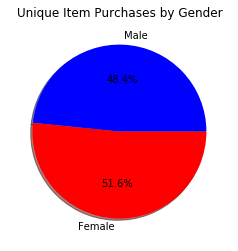

In [26]:
plt.pie(df.groupby('Gender')['Product_ID'].nunique(),labels=['Male','Female'],shadow=True, autopct='%1.1f%%',colors=['blue','red'])
plt.title('Unique Item Purchases by Gender')
plt.show()

In [28]:
# Individual groupby dataframes for each gender
gb_gender_m = df[df['Gender']=='M'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()
gb_gender_f = df[df['Gender']=='F'][['Product_Category_1','Gender']].groupby(by='Product_Category_1').count()
print(gb_gender_m)
print(gb_gender_f)

                    Gender
Product_Category_1        
1                   113952
2                    17926
3                    13975
4                     7995
5                   107393
6                    15689
7                     2740
8                    79185
9                      334
10                    3894
11                   19301
12                    2378
13                    4012
14                     887
15                    5180
16                    7334
17                     506
18                    2699
                    Gender
Product_Category_1        
1                    24401
2                     5573
3                     5874
4                     3572
5                    41199
6                     4475
7                      928
8                    32947
9                       70
10                    1138
11                    4659
12                    1497
13                    1428
14                     613
15                    1023
1

In [31]:
# Concatenate and change column names
cat_bygender = pd.concat([gb_gender_m,gb_gender_f],axis=1)
cat_bygender.columns = ['M ratio','F ratio']
print(cat_bygender)

                    M ratio  F ratio
Product_Category_1                  
1                    113952    24401
2                     17926     5573
3                     13975     5874
4                      7995     3572
5                    107393    41199
6                     15689     4475
7                      2740      928
8                     79185    32947
9                       334       70
10                     3894     1138
11                    19301     4659
12                     2378     1497
13                     4012     1428
14                      887      613
15                     5180     1023
16                     7334     2363
17                      506       61
18                     2699      376


In [32]:
# Adjust to reflect ratios
cat_bygender['M ratio'] = cat_bygender['M ratio']/df[df['Gender']=='M'].count()[0]
cat_bygender['F ratio'] = cat_bygender['F ratio']/df[df['Gender']=='F'].count()[0]

# Create likelihood of one gender to buy over the other
cat_bygender['Likelihood (M/F)'] = cat_bygender['M ratio']/cat_bygender['F ratio']

cat_bygender['Total Ratio'] = cat_bygender['M ratio']+cat_bygender['F ratio']


In [33]:
cat_bygender.sort_values(by='Likelihood (M/F)',ascending=False)

,M ratio,F ratio,Likelihood (M/F),Total Ratio
Product_Category_1,,,,
17,0.001248,0.000461,2.705079,0.001710
18,0.006658,0.002844,2.340854,0.009502
15,0.012778,0.007738,1.651252,0.020517
9,0.000824,0.000530,1.555993,0.001353
1,0.281099,0.184581,1.522908,0.465680
11,0.047612,0.035243,1.350972,0.082855
6,0.038702,0.033851,1.143303,0.072553
10,0.009606,0.008608,1.115868,0.018214
2,0.044220,0.042157,1.048947,0.086377


In [34]:
df['Age_Encoded'] = df['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})

In [35]:
df['Age_Encoded']

0         0
1         0
2         0
3         0
4         6
5         2
6         4
7         4
8         4
9         2
10        2
11        2
12        2
13        2
14        5
15        5
16        5
17        5
18        3
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        3
         ..
537547    1
537548    5
537549    5
537550    4
537551    4
537552    4
537553    4
537554    4
537555    4
537556    1
537557    1
537558    1
537559    1
537560    1
537561    1
537562    1
537563    1
537564    1
537565    1
537566    1
537567    1
537568    1
537569    1
537570    1
537571    3
537572    3
537573    3
537574    3
537575    3
537576    3
Name: Age_Encoded, Length: 537577, dtype: int64

# Age

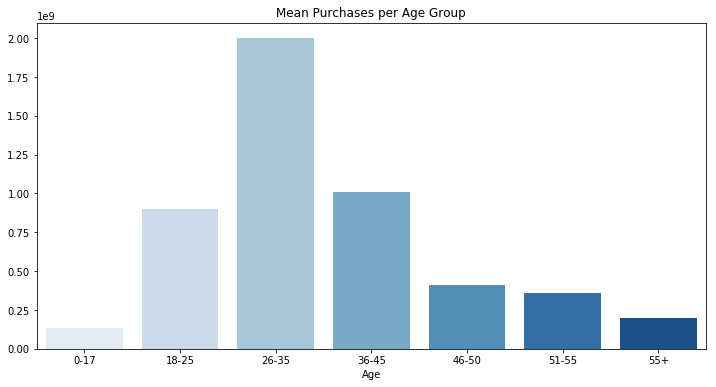

In [38]:

spent_byage = df.groupby(by='Age').sum()['Purchase']
plt.figure(figsize=(12,6))
sns.barplot(x=spent_byage.index,y=spent_byage.values, palette="Blues")
plt.title('Mean Purchases per Age Group')
plt.show()

# Occupation

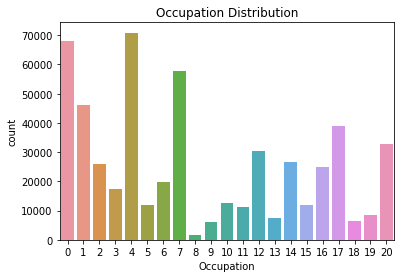

In [42]:
sns.countplot(df['Occupation'])
plt.title('Occupation Distribution')
plt.show()

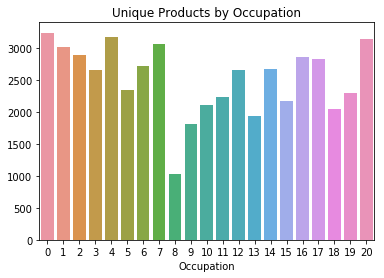

In [43]:
prod_by_occ = df.groupby(by='Occupation').nunique()['Product_ID']

sns.barplot(x=prod_by_occ.index,y=prod_by_occ.values)
plt.title('Unique Products by Occupation')
plt.show()

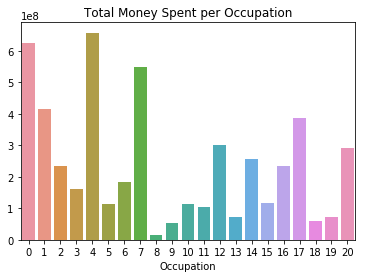

In [44]:
spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()